# Milestone 1 Data Cleaning and Processing

1.Data Cleaning:
Handle missing values.
Normalize or scale numerical features.
oHandle outliers.

In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek

In [61]:
df = pd.read_csv('Cleaned_Aligned_Academic_Performance_Data.csv')

We first look at the empty value of each column and there is none. 

In [62]:
# Count the number of missing values per column
missing_count = df.isnull().sum()
print(missing_count)

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

we developed mapping rules:Drop out to 0; Graduate to 1; Enrolled to 2.

In [63]:
df = pd.DataFrame(df)

# Defines the mapping rule
mapping_rules = {
    'Dropout': 0,
    'Graduate': 1,
    'Enrolled': 2
}

# Transformation was performed using the replace method
df['Target'] = df['Target'].replace(mapping_rules)

# Print out the processed data
print(df)

      Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1             

/var/folders/7n/d9qmmxt5407_l91r55zkq3hh0000gn/T/ipykernel_24229/1123371519.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Target'] = df['Target'].replace(mapping_rules)


In [64]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Make scaling
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

Thirdly, we started to deal with outliers. We remove outliers by setting the upper bound and lower bound by three stand deviations.

In [65]:
#removing outliers
def detect_and_remove_outliers(df):

    cleaned_df = df.copy()
    
    for column in df.columns:

        mean = df[column].mean()
        std = df[column].std()
        

        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
        
    
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f'Outliers in column {column}: \n{outliers}')
        

        cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]
    
    return cleaned_df

To demonstrate the relationship between these variables, we used Pearson Correlation Matrix as follows. This heatmap can reveal the correlation with one another without being too overwhelming or compact.

In [66]:

cleaned_df = detect_and_remove_outliers(df)




Outliers in column Marital status: 
      Marital status  Application mode  Application order  Course  \
38                 4                39                  1    9991   
65                 4                42                  1    9500   
103                4                39                  1    9003   
166                3                39                  1    9003   
281                4                 1                  1    8014   
...              ...               ...                ...     ...   
4276               5                39                  1    9147   
4321               4                39                  1    9991   
4354               4                39                  1    9991   
4374               5                 7                  1    9500   
4415               4                39                  1    9500   

      Daytime/evening attendance\t  Previous qualification  \
38                               0                       1   
65         

We import pearson correlation matrix and examine the relationship between variables.


Pearson Correlation Matrix:
                                                Marital status  \
Marital status                                        1.000000   
Application mode                                      0.264006   
Application order                                    -0.125854   
Course                                                0.046365   
Daytime/evening attendance\t                         -0.274939   
Previous qualification                                0.062529   
Previous qualification (grade)                       -0.022406   
Nacionality                                          -0.008843   
Mother's qualification                                0.193163   
Father's qualification                                0.130353   
Mother's occupation                                   0.034994   
Father's occupation                                   0.031609   
Admission grade                                      -0.004771   
Displaced                                      

/Users/wangyi/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.draw()
/Users/wangyi/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


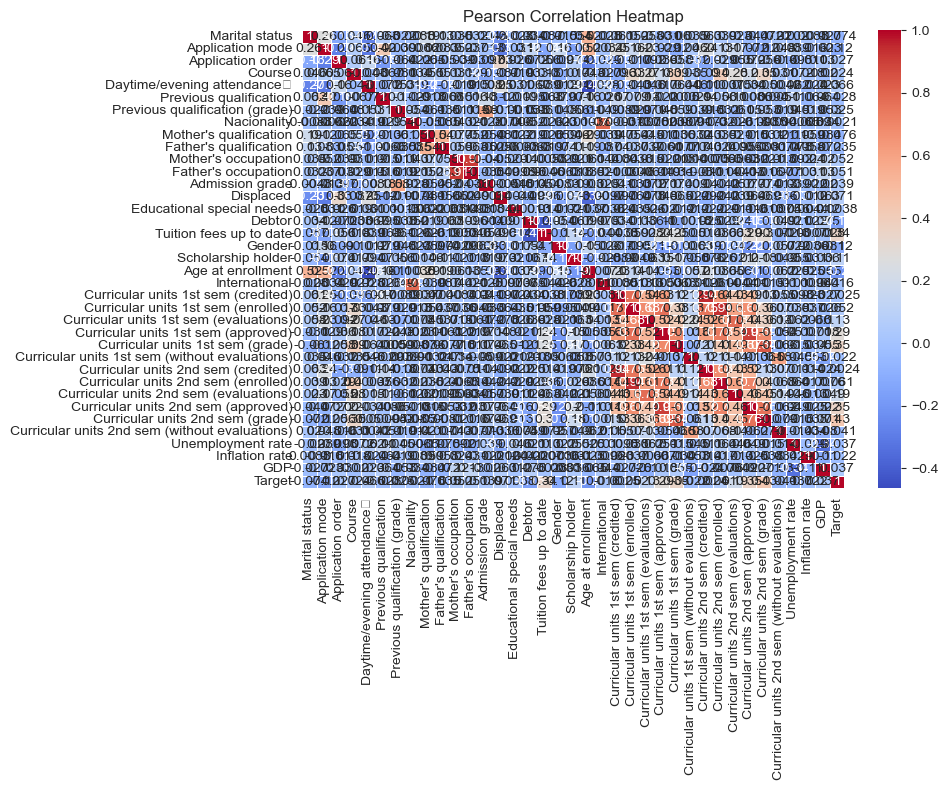

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

pearson_corr = df.corr(method='pearson')
print("\nPearson Correlation Matrix:")
print(pearson_corr)


spearman_corr = df.corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print(spearman_corr)

# Draw the Pearson correlation heat map
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.tight_layout()
plt.show()


In [68]:
# Divide between the training set and the test sets
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
import numpy as np


X = cleaned_df.drop(columns=['Target'])  
y = cleaned_df['Target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Calculate the class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
class_weights_dict

{0: 1.102460850111857, 1: 0.6426708398539385, 2: 1.8624338624338623}

Principal component analysis, is a useful tool to put a large dataset into a small dataset, while still maintains its key feature of the dataset. When choosing the number of principal components (k), we choose k to be the smallest value so that for example, 99% of variance, is retained. As stated in the jupyter notebook, when k equals 1, we retained nearly 99% of the variance.

In [69]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)     
print(pca.explained_variance_ratio_)
# the first pca explains 99% variance so we can reduce the variables to 1 dimension
X_test = pca.fit_transform(X_test)  


[0.99223294]


# Milestone 2: Exploratory Data Analysis (EDA)

Identify key patterns and trends in dropout and graduation rates.
Visualize the distribution of features and their relationship with the target variable.
Highlight any demographic or socioeconomic trends affecting academic outcomes.

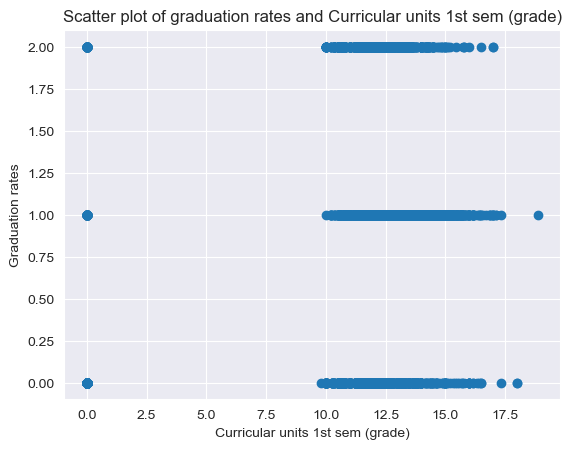

In [72]:
# draw scattered plot
plt.scatter(df['Curricular units 1st sem (grade)'],df['Target'])
plt.title('Scatter plot of graduation rates and Curricular units 1st sem (grade)')
plt.xlabel('Curricular units 1st sem (grade)')
plt.ylabel('Graduation rates')
plt.show()
#From the heat map we can see the positive relationship between Curricular units 1st sem (grade) and target , so we draw the scatter plot of 
#these variables 

Text(0.5, 1.0, 'Histogram plot of Age at enrollment')

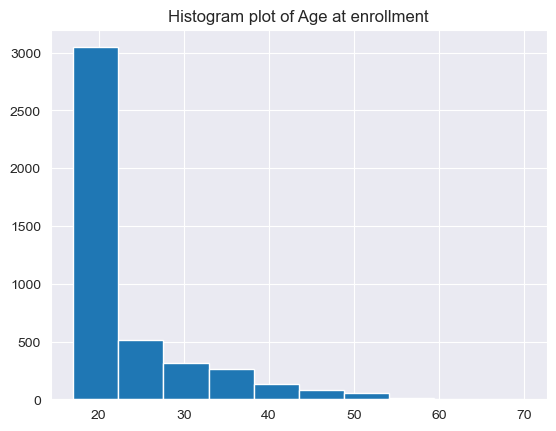

In [73]:
#Visualize the distribution of demographic  ages enrolled 
plt.hist(df['Age at enrollment'])
plt.title('Histogram plot of Age at enrollment')
#From the plot we can see that most people enrolled at their young age during 20s to 30s

 we employed density plot to check the distribution and skewness of our variables

/var/folders/7n/d9qmmxt5407_l91r55zkq3hh0000gn/T/ipykernel_24229/3510595164.py:15: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  plt.tight_layout()
/Users/wangyi/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


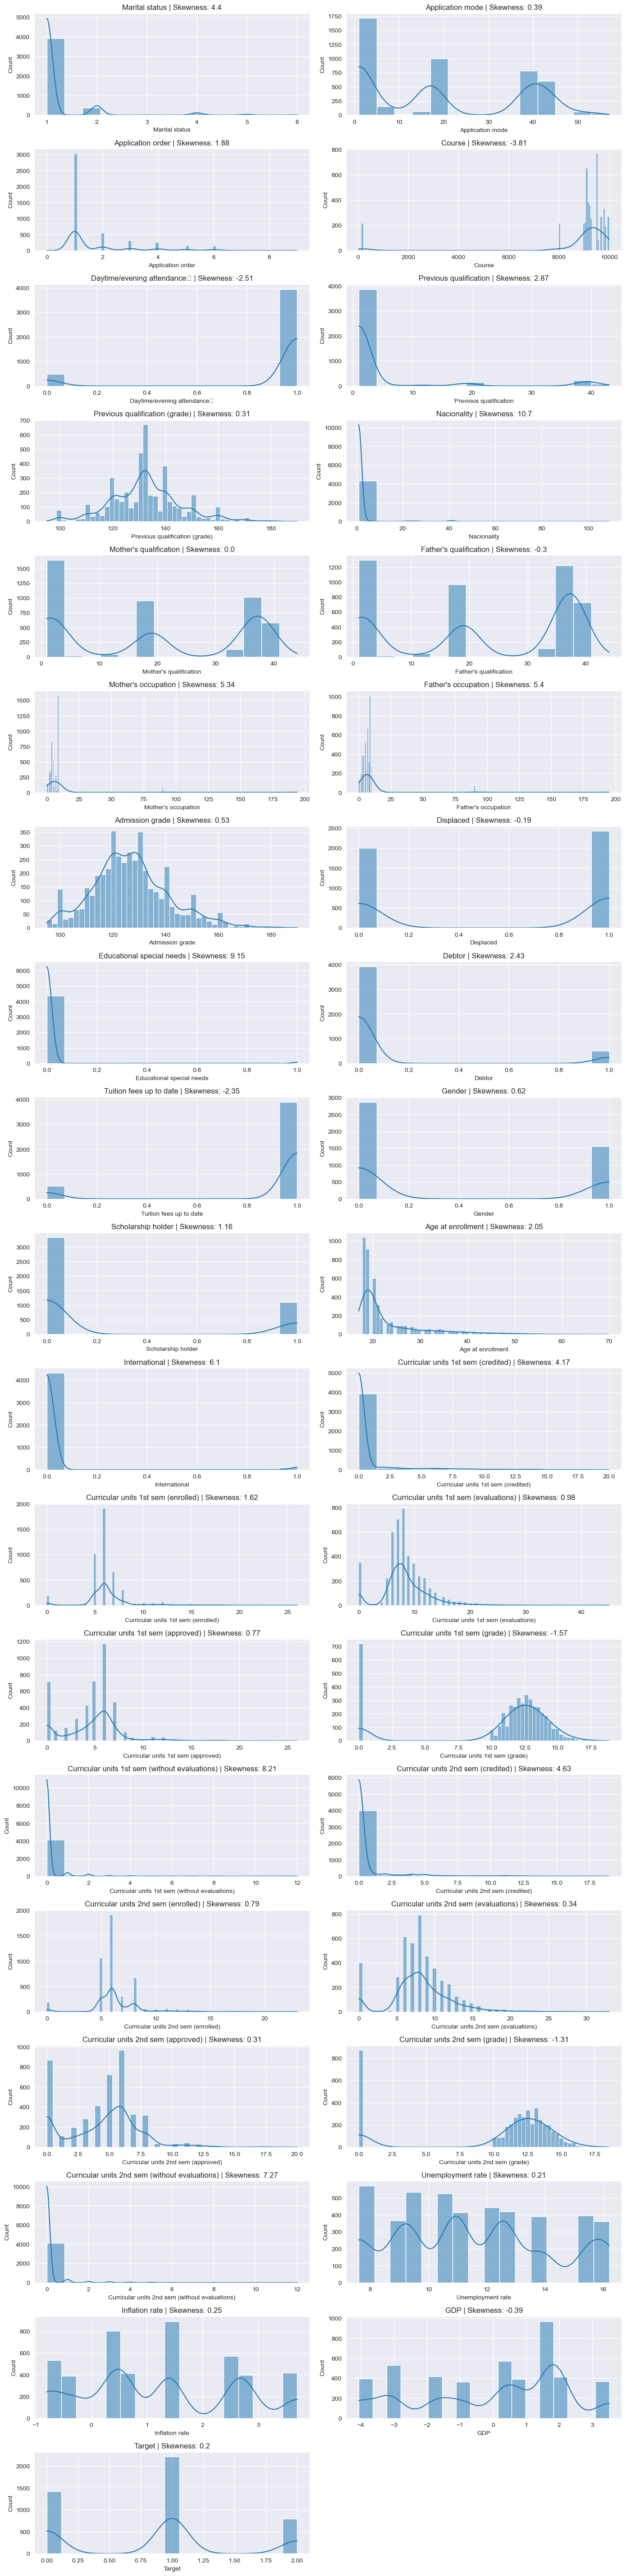

In [74]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# From this density plot we can see that most previous education is secondary education; and most of our data comes from Portuguese

# Milestone 3: Model Development

Gradient Boosting Models  Random Forest

We choose two models including gradient boosting models and random forest for comparison and evaluation.First of all, we split data for training set and testing set. Training set is used to train our models and testing set for evaluation. 

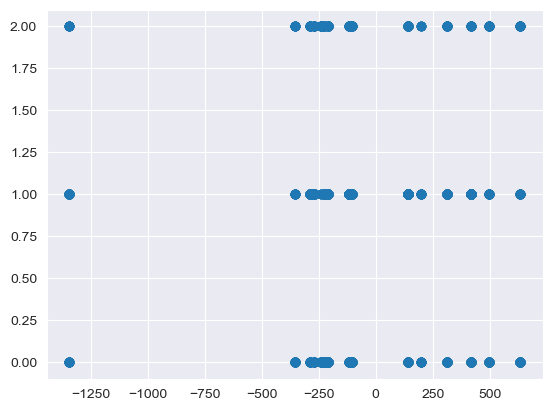

In [77]:
plt.scatter(X_train,y_train)
plt.show()

We import gradient boosting libraries

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
gradientboost = GradientBoostingClassifier()
gradientboost.fit(X_train,y_train)

GradientBoostingClassifier()

We use gradient boosting model to train and test. And we evaluate f1 score.

There are there are 99 models in testing set who are graduate are predicted as drop, 196 models in testing set who are graduate are predicted as graduate, 18 models in testing set who are graduate are predicted as enrolled. There are there are 51 models in testing set who are enrolled are predicted as drop, 196 models in testing set who are enrolled are predicted as graduate, 18 models in testing set who are enrolled are predicted as enrolled.

In [79]:
y_preds=gradientboost.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_preds))
from sklearn.metrics import f1_score

print(f1_score(y_test, y_preds, average='macro'))  # 0.34692271928859886
print(f1_score(y_test, y_preds, average='micro'))  # 0.46353322528363045
print(f1_score(y_test, y_preds, average='weighted'))  # 0.4402886937054027
print(f1_score(y_test, y_preds, average=None))  # [0.39908257 0.60030628 0.04137931]
print("Accuracy:",metrics.accuracy_score(y_test, y_preds))


[[ 87  93  19]
 [ 99 196  18]
 [ 51  51   3]]
0.34692271928859886
0.46353322528363045
0.4402886937054027
[0.39908257 0.60030628 0.04137931]
Accuracy: 0.46353322528363045


We import random forest libraries

In [80]:


# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint




# Milestone 4: Model Evaluation and Reporting

1.Model Metrics:
Evaluate accuracy, sensitivity, specificity, and F1-score.
Include confusion matrices for better visualization.
2.Comparison:
Compare models based on performance metrics.
Discuss trade-offs and justify the choice of the best model.

 Our another model evaluation techniques if F1 score. Usually F1 score from 0.8-0.9, means a good score, F1 score from 0.5-0.8 means an OK score.

We build random forest models and evaluate it in F1 score and confusion matrix.There are there are 157 models in testing set who are graduate are predicted as drop, 0 models in testing set who are graduate are predicted as graduate, 156 models in testing set who are graduate are predicted as enrolled. There are there are 74 models in testing set who are enrolled are predicted as drop, 0 models in testing set who are enrolled are predicted as graduate, 31 models in testing set who are enrolled are predicted as enrolled.

In [83]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_preds = rf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_preds))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_preds))
print(f1_score(y_test, y_preds, average='macro'))  
print(f1_score(y_test, y_preds, average='micro'))  
print(f1_score(y_test, y_preds, average='weighted'))  
print(f1_score(y_test, y_preds, average=None)) 

Accuracy: 0.26418152350081037
[[132   0  67]
 [157   0 156]
 [ 74   0  31]]
0.21415094651347985
0.26418152350081037
0.18089810661529884
[0.46975089 0.         0.17270195]
